In [91]:
import pandas as pd
import numpy as np

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
train = pd.read_csv('data/train.csv')

In [94]:
train.iloc[:, 1:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     20000 non-null  int64 
 1   Gender                  20000 non-null  object
 2   Education_Status        20000 non-null  object
 3   Employment_Status       20000 non-null  object
 4   Working_Week (Yearly)   20000 non-null  int64 
 5   Industry_Status         20000 non-null  object
 6   Occupation_Status       20000 non-null  object
 7   Race                    20000 non-null  object
 8   Hispanic_Origin         20000 non-null  object
 9   Martial_Status          20000 non-null  object
 10  Household_Status        20000 non-null  object
 11  Household_Summary       20000 non-null  object
 12  Citizenship             20000 non-null  object
 13  Birth_Country           20000 non-null  object
 14  Birth_Country (Father)  20000 non-null  object
 15  Bi

### 중복 컬럼 확인

In [95]:
len(train.iloc[:, 1:-1].drop_duplicates())

18320

In [96]:
features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status']

In [97]:
len(features)

21

In [98]:
# chr_list = []
# for i in range(97, 97+21):
#     chr_list.append(chr(i))
# print(chr_list)
# print(','.join(chr_list))
# print(')+str('.join(chr_list))

In [99]:
# feat_list = []
# for f in features:
#     feat_list.append(f"train['{f}']")
# ','.join(feat_list)

In [100]:
# train['key'] = [str(a)+str(b)+str(c)+str(d)+str(e)+str(f)+str(g)+str(h)+str(i)+str(j)+str(k)+str(l)+str(m)+str(n)+str(o)+str(p)+str(q)+str(r)+str(s)+str(t)+str(u) for a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u in zip(train['Age'],train['Gender'],train['Education_Status'],train['Employment_Status'],train['Working_Week (Yearly)'],train['Industry_Status'],train['Occupation_Status'],train['Race'],train['Hispanic_Origin'],train['Martial_Status'],train['Household_Status'],train['Household_Summary'],train['Citizenship'],train['Birth_Country'],train['Birth_Country (Father)'],train['Birth_Country (Mother)'],train['Tax_Status'],train['Gains'],train['Losses'],train['Dividends'],train['Income_Status'])]

In [101]:
def concatenate_columns(row):
    columns = [
        row['Age'], row['Gender'], row['Education_Status'], row['Employment_Status'],
        row['Working_Week (Yearly)'], row['Industry_Status'], row['Occupation_Status'],
        row['Race'], row['Hispanic_Origin'], row['Martial_Status'], row['Household_Status'],
        row['Household_Summary'], row['Citizenship'], row['Birth_Country'],
        row['Birth_Country (Father)'], row['Birth_Country (Mother)'], row['Tax_Status'],
        row['Gains'], row['Losses'], row['Dividends'], row['Income_Status']
    ]
    return ''.join(map(str, columns))

train['key'] = train.apply(concatenate_columns, axis=1)

In [102]:
len(set(train['key']))

18320

In [103]:
count = 0
total_count = 0
total_count_row = 0
dup_idxs = []
for k in set(train['key']):
    income = train.loc[train['key']==k, 'Income']
    l = list(income)
    if len(l) > 1:
        if len(np.unique(l))>=2: # 중복 존재 & income이 다른 경우
            # print(l)   
            count += 1
            dup_idxs.append(list(income.index))
        total_count += 1
        total_count_row += len(l)
print(count, total_count, total_count_row)

159 408 2088


In [104]:
min_list, max_list = [], []
avg_list = []
for idxs in dup_idxs:
    df = train.iloc[idxs]
    l = df['Income']
    # print(list(l))
    min_list.append(min(l))
    max_list.append(max(l))
    avg_list.append(sum(l)/len(l))

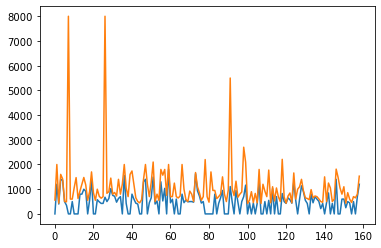

In [107]:
plt.plot(min_list, label='min')
plt.plot(max_list, label='max')
# plt.plot(avg_list, label='avg')
plt.show()

In [106]:
def

SyntaxError: invalid syntax (<ipython-input-106-7b18d017f89f>, line 1)

In [ ]:
# min_list, max_list = [], []
# for idxs in dup_idxs:
#     df = train.iloc[idxs]
#     l = df['Income']
#     # print(list(l))
#     max_val = max(list(l))
#     # train.loc[idxs, 'Income'] = max_val

In [ ]:
train.iloc[idxs]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,key
7132,TRAIN_07132,36,F,College,Children or Armed Forces,52,Wholesale,Admin Support (include Clerical),White,All other,...,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1528,36FCollegeChildren or Armed Forces52WholesaleA...
8100,TRAIN_08100,36,F,College,Children or Armed Forces,52,Wholesale,Admin Support (include Clerical),White,All other,...,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1528,36FCollegeChildren or Armed Forces52WholesaleA...


### max, avg로 보간하는 방법 고려 가능

In [ ]:
def

SyntaxError: invalid syntax (<ipython-input-87-7b18d017f89f>, line 1)

### 결측치 없음

In [ ]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


c:\Users\sunbin\anaconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


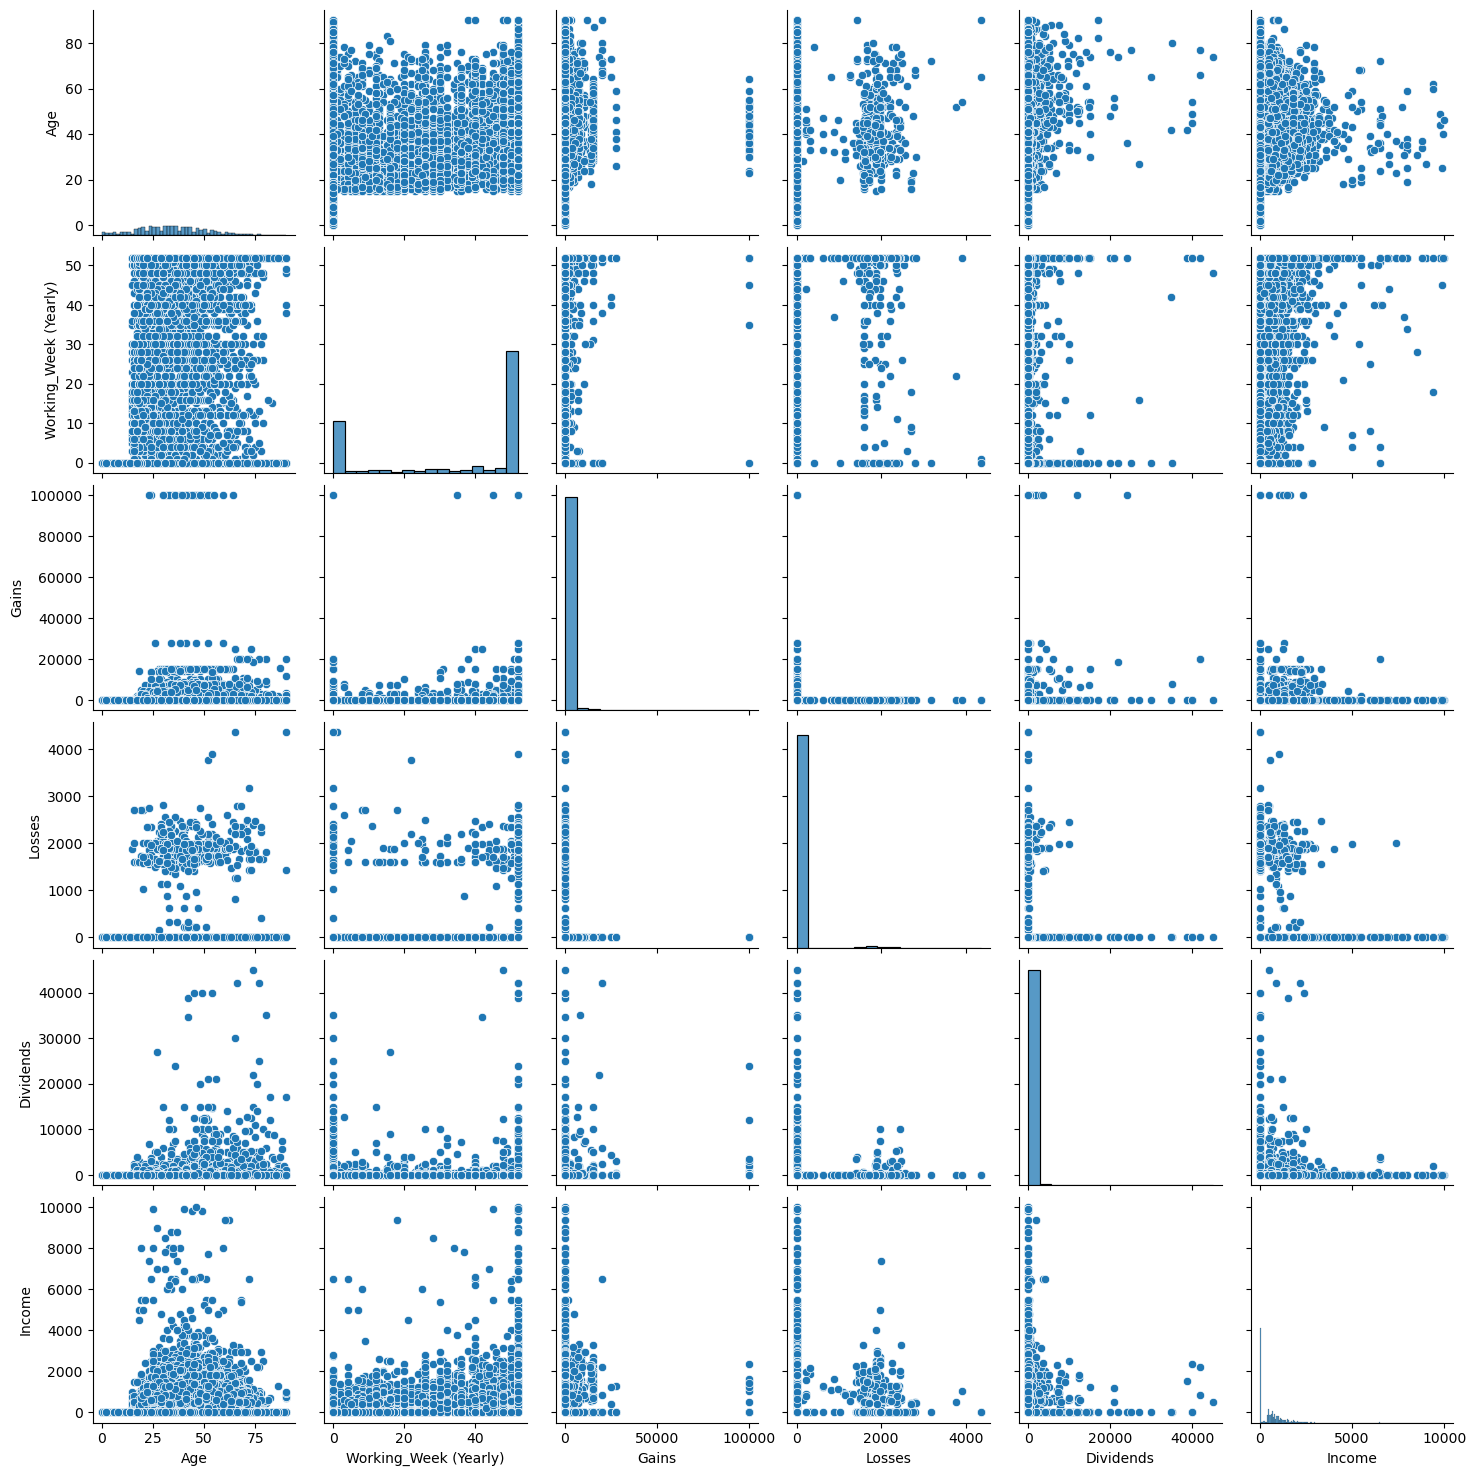

In [ ]:
sns.pairplot(train)
plt.show()

### correlation

In [ ]:
# corr = train.corr()
# sns.heatmap(corr, annot=True)

In [ ]:
cat_cols = list(train.dtypes[train.dtypes == "object"].index)
cat_cols

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

### target 분포 확인

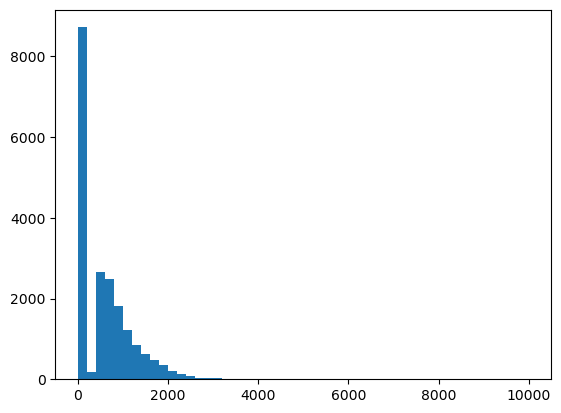

In [ ]:
plt.hist(train['Income'], bins=50)
plt.show()

#### 0이 대부분

#### 0값 제거한 분포 확인

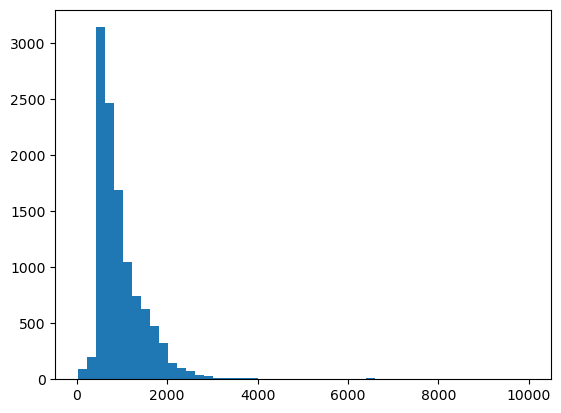

In [ ]:
df = train.loc[train['Income']>0]
plt.hist(df['Income'], bins=50)
plt.show()

In [ ]:
train.loc[train['Income']>0].describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,36.648500,45.100504,299.215341,43.156773,94.834911,981.270902
std,13.054764,13.602901,2986.794334,285.872584,1072.039666,672.429063
min,15.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,26.000000,46.000000,0.000000,0.000000,0.000000,585.000000
50%,35.000000,52.000000,0.000000,0.000000,0.000000,800.000000
75%,46.000000,52.000000,0.000000,0.000000,0.000000,1200.000000
max,90.000000,52.000000,99999.000000,3900.000000,45000.000000,9999.000000


#### 2000 이상 확인

491


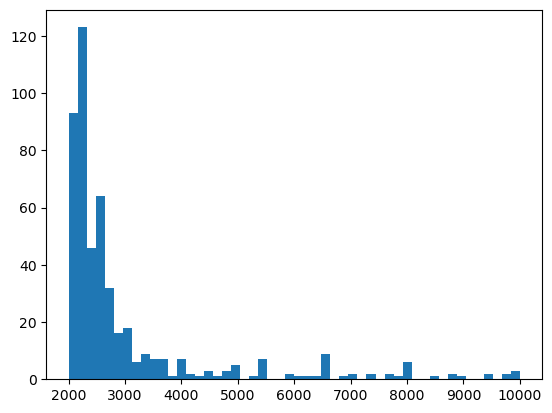

In [ ]:
df = train.loc[train['Income']>2000]
print(len(df))
plt.hist(df['Income'], bins=50)
plt.show()

In [ ]:
df = train.loc[train['Income']>2000]

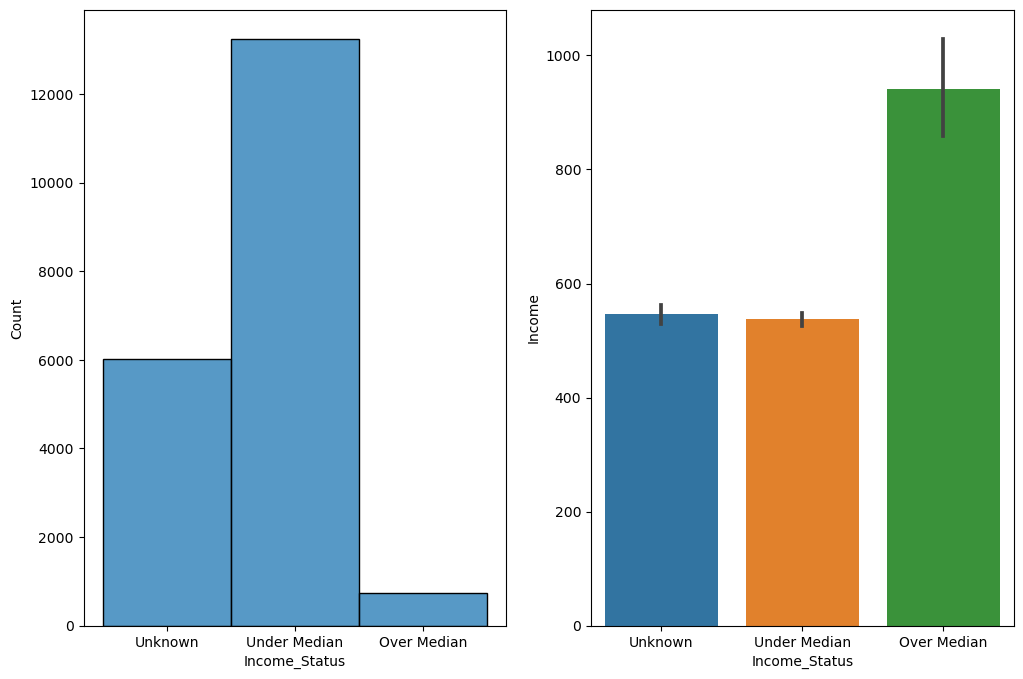

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='Income_Status')

plt.subplot(1, 2, 2)
sns.barplot(data=train, x='Income_Status', y='Income')

plt.show()

In [ ]:
unknown = train.loc[train['Income_Status']=='Unknown']
under = train.loc[train['Income_Status']=='Under Median']
over = train.loc[train['Income_Status']=='Over Median']

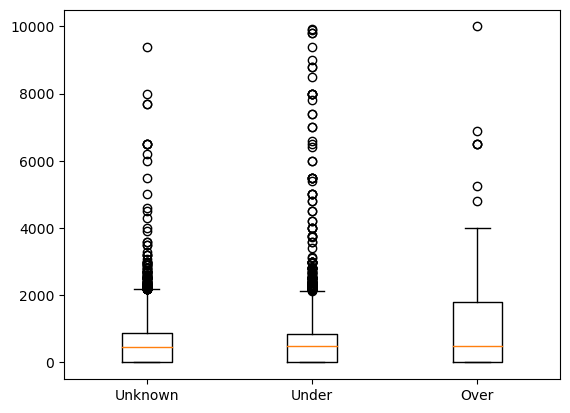

In [ ]:
plt.boxplot([unknown['Income'], under['Income'], over['Income']])
plt.xticks([1, 2, 3], ['Unknown', 'Under', 'Over'])
plt.show()

In [ ]:
under = train.loc[train['Income_Status']!='Over Median']
over = train.loc[train['Income_Status']=='Over Median']

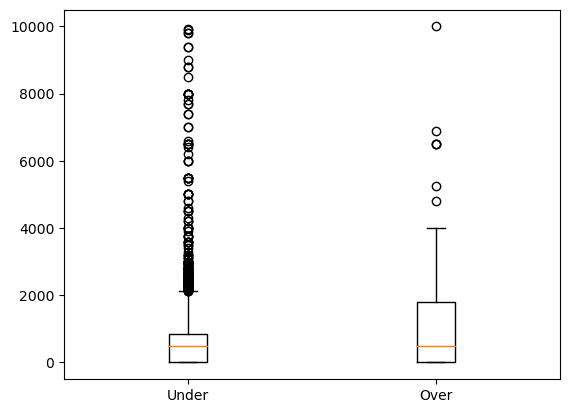

In [ ]:
plt.boxplot([under['Income'], over['Income']])
plt.xticks([1, 2], ['Under', 'Over'])
plt.show()

In [ ]:
def

SyntaxError: invalid syntax (1102136943.py, line 1)

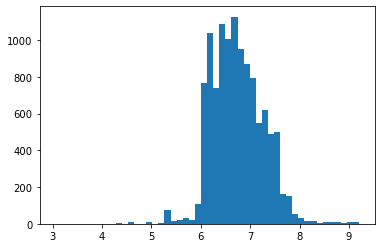

In [ ]:
plt.hist(np.log(df['Income']+1), bins=50)
plt.show()

In [ ]:
sum(train['Income']==0), sum(train['Income']>0)

(8697, 11303)

#### income = 0 : 8697, income > 0 : 11303
#### 즉 대략 반반 정도의 비율

### Age

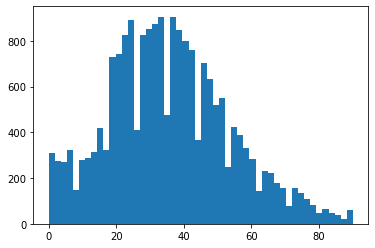

In [ ]:
plt.hist(train['Age'], bins=50)
plt.show()

### Working Week

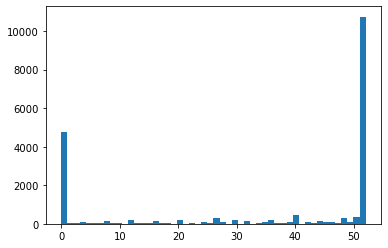

In [ ]:
plt.hist(train['Working_Week (Yearly)'], bins=50)
plt.show()

In [ ]:
np.unique(train['Working_Week (Yearly)'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

#### 0 또는 52가 대부분

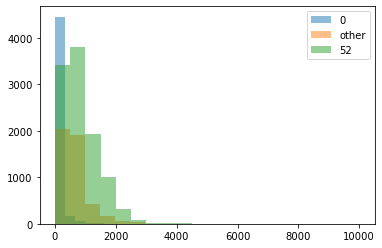

In [ ]:
income_0 = train.loc[train['Working_Week (Yearly)']==0].Income
income_52 = train.loc[train['Working_Week (Yearly)']==52].Income
income_other = train.loc[(train['Working_Week (Yearly)']>0)&(train['Working_Week (Yearly)']<52)].Income
plt.hist(income_0, alpha=0.5, bins=20, label=0)
plt.hist(income_other, alpha=0.5, bins=20, label='other')
plt.hist(income_52, alpha=0.5, bins=20, label=52)
plt.legend()
plt.show()

### Gains, Losses, Dividend

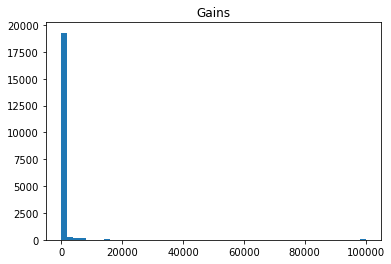

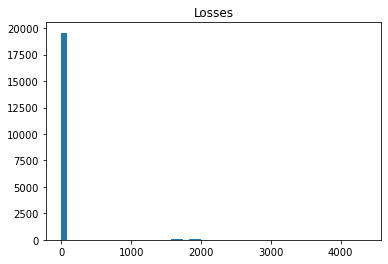

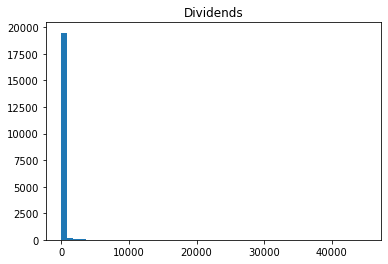

In [ ]:
cols = ['Gains', 'Losses', 'Dividends']

for c in cols:
    plt.title(c)
    plt.hist(train[c], bins=50)
    plt.show()

#### 대부분 0에 치우친 값, 다른 처리 필요

### 카테고리 컬럼 확인

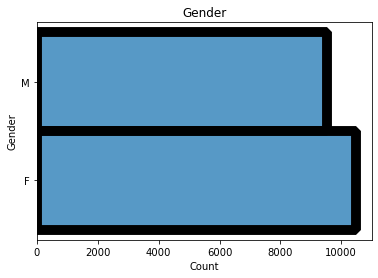

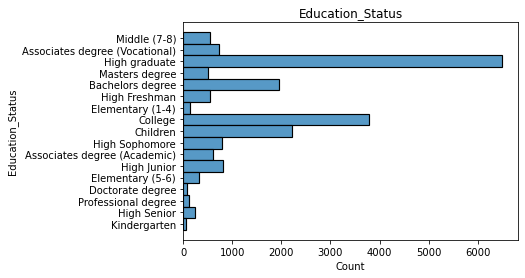

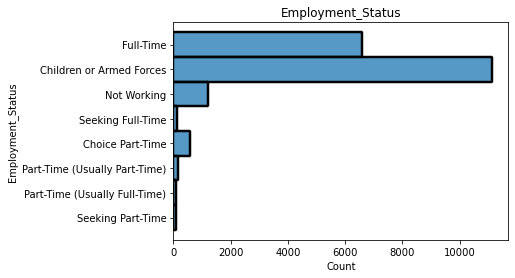

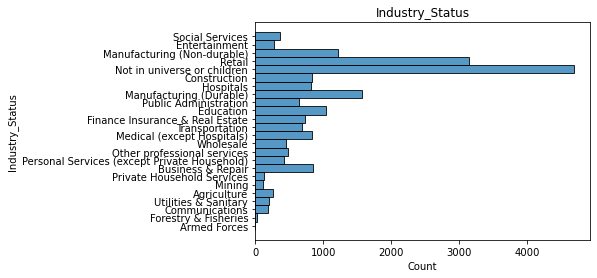

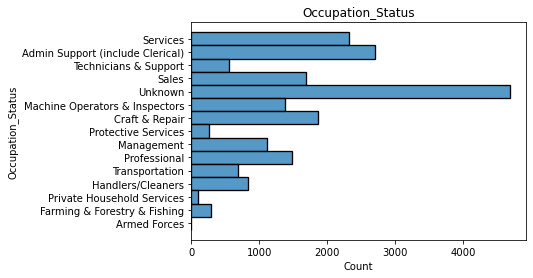

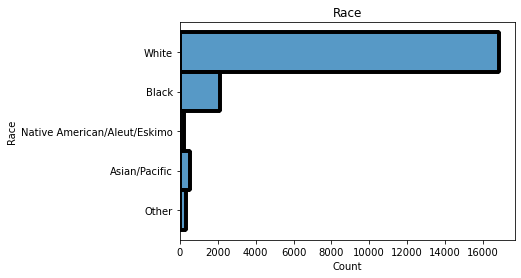

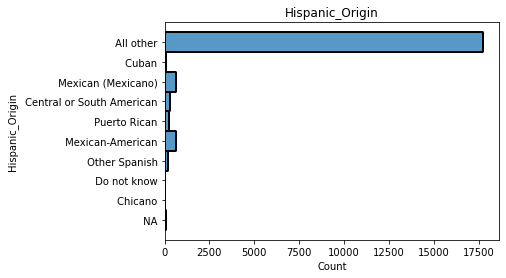

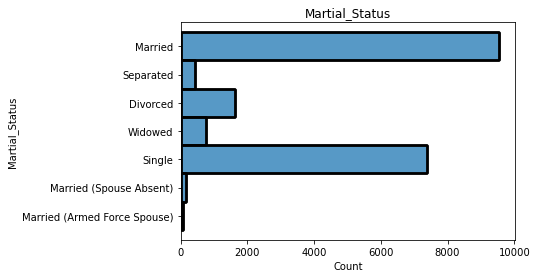

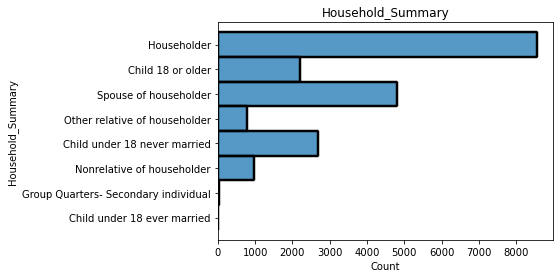

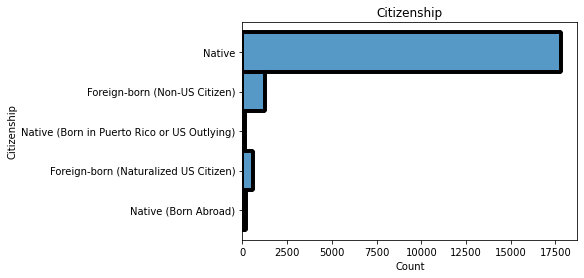

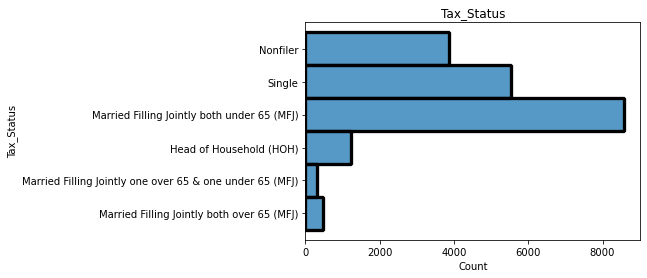

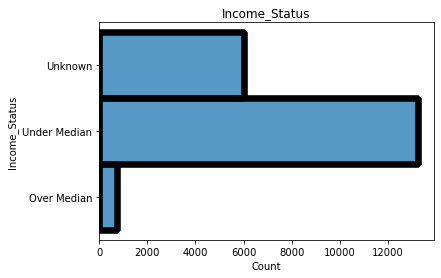

In [ ]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=train[c])
    plt.show()

### employment status : children or armed forces

### industry status : Not in universe or children

### occupation status : unknown

### Income_Status : unknown

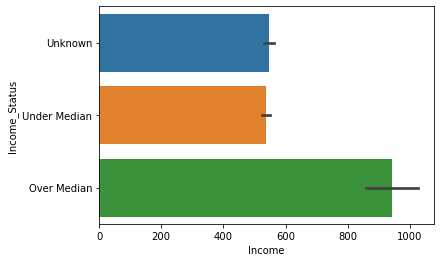

In [ ]:
sns.barplot(y='Income_Status', x='Income', data=train, orient='h')
plt.show()

### income > 1000과의 분포 차이 확인

In [ ]:
train['over'] = train['Income'] > 875

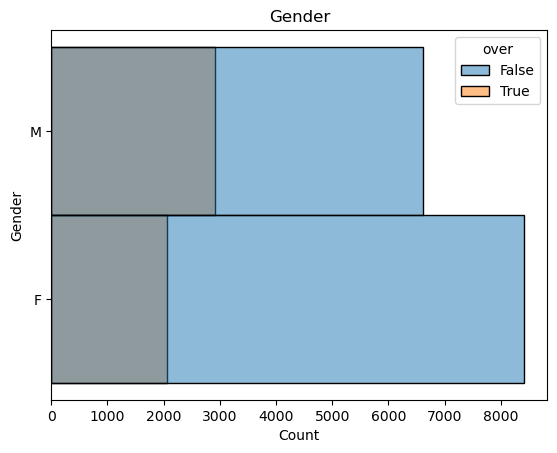

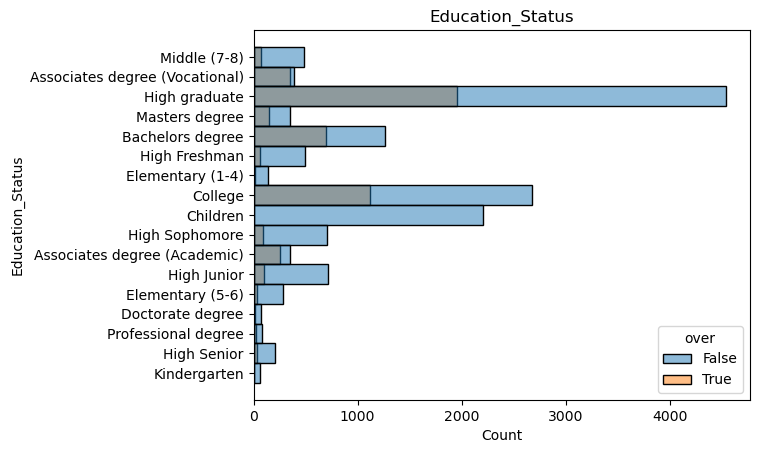

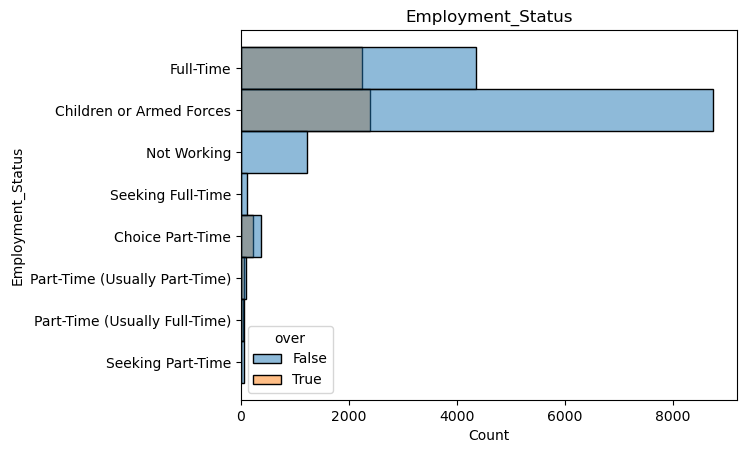

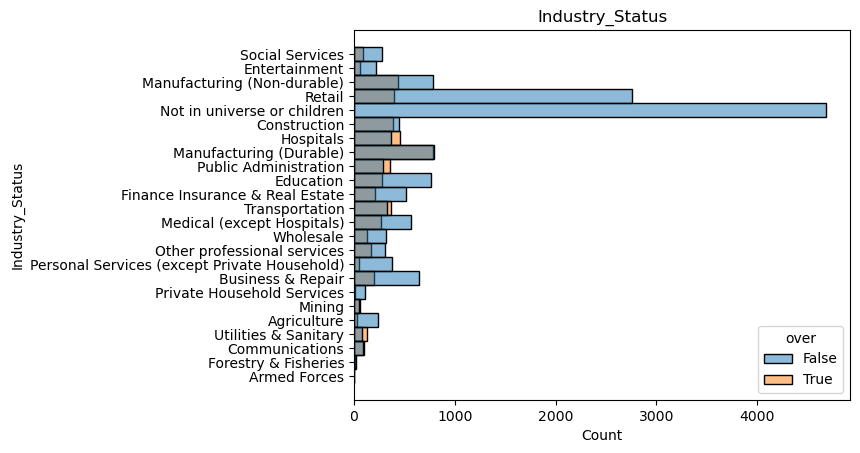

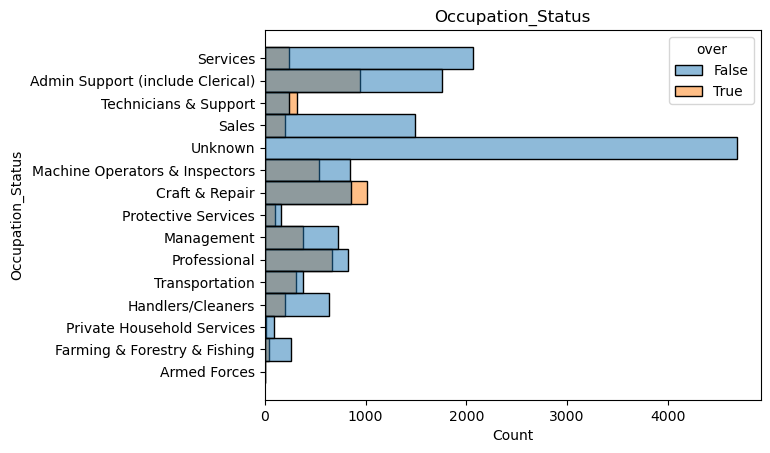

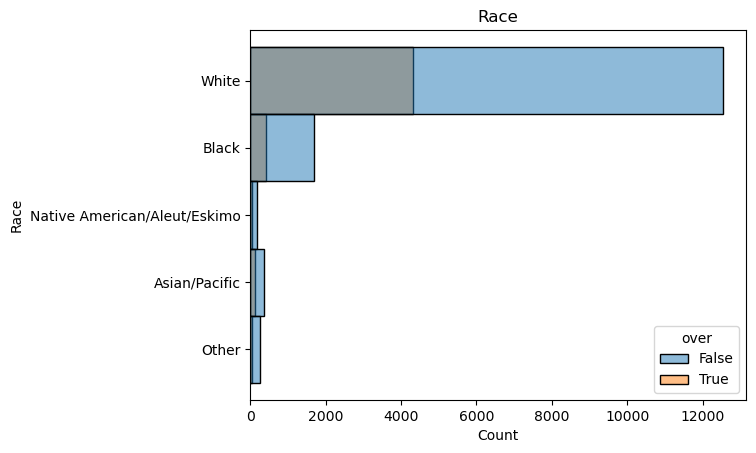

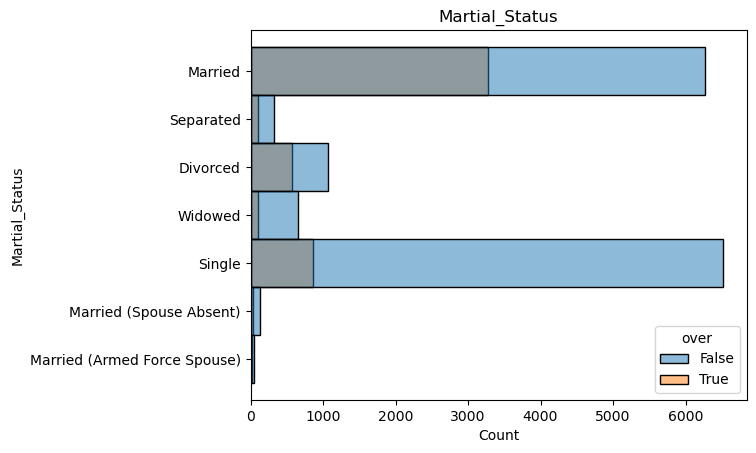

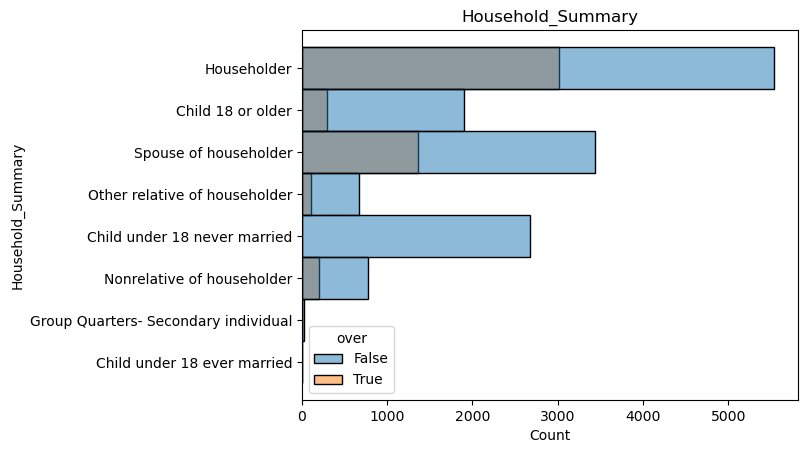

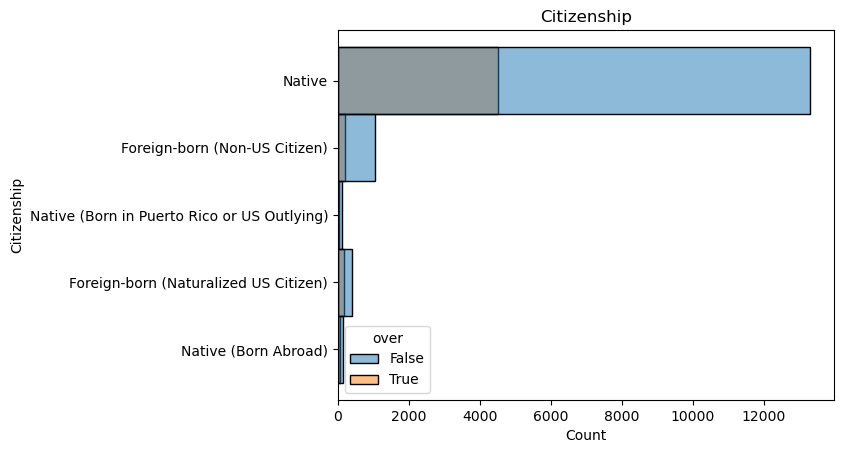

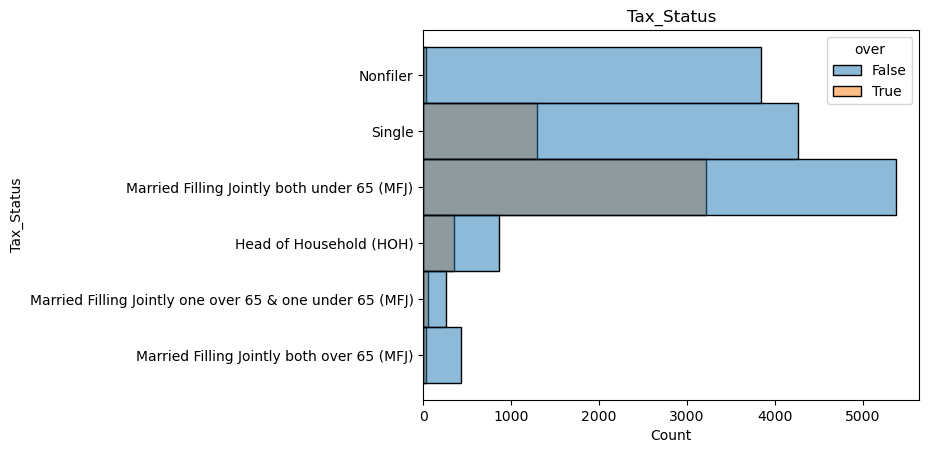

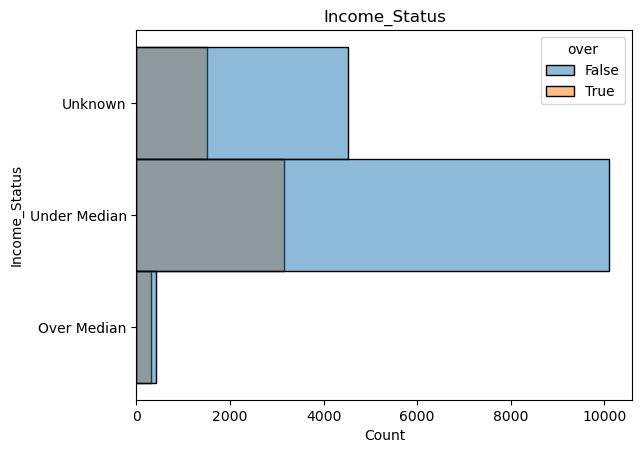

In [ ]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=c, data=train, hue='over')
    plt.show()